In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Wed, 27 Nov 2024 10:22


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"13,060,004","13,594,193","534,189",4.09%
Collector,"72,096","86,323","14,227",19.73%
Freeway,"46,455,221","44,293,975","-2,161,246",-4.65%
HOV,"246,053","266,649","20,596",8.37%
Ramp,"334,132","249,849","-84,283",-25.22%
Total,"60,167,506","58,490,989","-1,676,517",-2.79%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"32,134,146","31,768,218","-365,928",-1.14%
Kitsap,"3,636,120","2,875,362","-760,758",-20.92%
Pierce,"12,521,558","12,567,991","46,433",0.37%
Snohomish,"11,875,682","11,279,418","-596,264",-5.02%
Total,"60,167,506","58,490,989","-1,676,517",-2.79%


----
### Daily | Scatterplots 

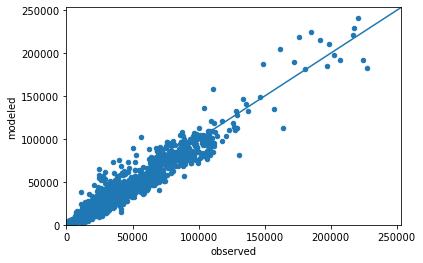

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9595549325982043


---
By County

King r^2: 0.959737053935084
Kitsap r^2: 0.9607851777280488
Pierce r^2: 0.9635783007700333


Snohomish r^2: 0.9465490809036683


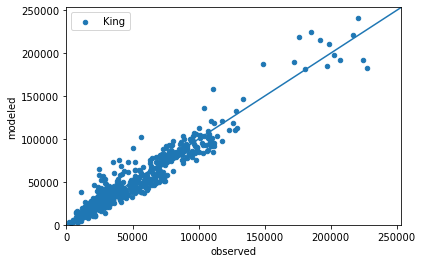

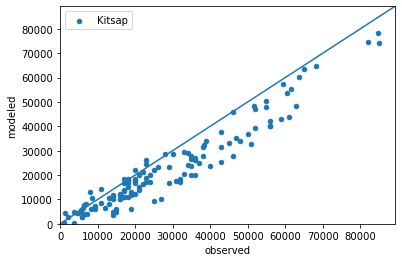

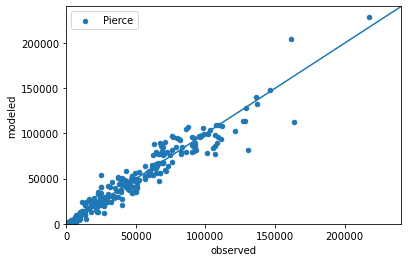

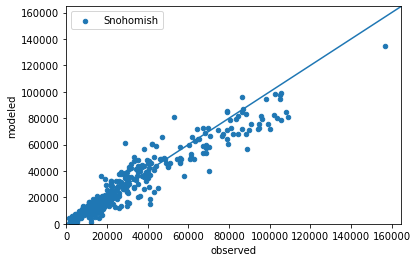

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9491099378158969


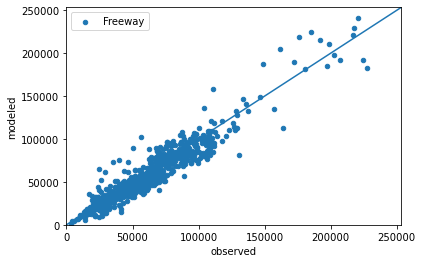

In [10]:
for factype in ['Freeway']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.6459480628752471


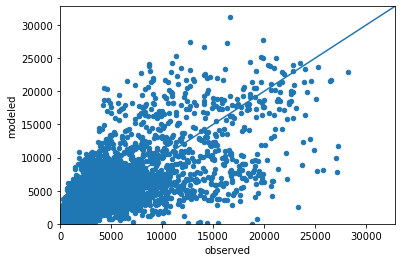

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"592,476","498,535",King,"-93,941",-15.86%
1,KENT,"559,335","461,811",King,"-97,524",-17.44%
2,SHIP CANAL,"480,070","486,505",King,"6,435",1.34%
3,SEATTLE - SOUTH OF CBD,"473,322","460,535",King,"-12,787",-2.70%
4,MILL CREEK,"391,447","369,742",King,"-21,705",-5.54%
5,SOUTH BELLEVUE,"389,700","352,427",King,"-37,273",-9.56%
6,KIRKLAND-REDMOND,"381,663","364,359",King,"-17,304",-4.53%
7,SEATTLE - NORTH,"356,051","343,020",King,"-13,031",-3.66%
8,TACOMA - EAST OF CBD,"324,463","334,032",Pierce,"9,569",2.95%
9,PARKLAND,"299,722","271,691",Pierce,"-28,031",-9.35%


r^2 : 0.9843640087470741


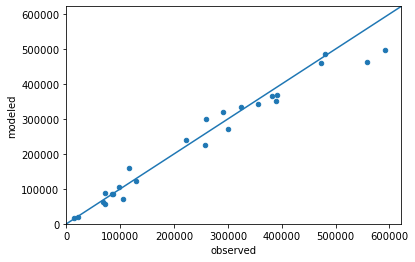

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
2,King County Metro,"253,314","429,834","176,521",69.68%
5,Sound Transit,"113,374","110,545","-2,829",-2.50%
0,Community Transit,"25,962","46,620","20,658",79.57%
4,Pierce Transit,"21,185","44,595","23,410",110.50%
6,Washington Ferries,"9,278",971,"-8,307",-89.53%
3,Kitsap Transit,"8,258","11,334","3,076",37.25%
1,Everett Transit,"4,201","8,471","4,270",101.63%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,973 W Sea Water Taxi,759,393,-366,-48.25%
1,975 Vashn Water Taxi,338,94,-244,-72.06%
2,WSF Edmonds-Kingston,"1,500",50,"-1,450",-96.67%
3,WSF Seattle-Bain Isl,"5,514",501,"-5,013",-90.91%
4,WSF Seattle-Brem,"1,189",15,"-1,174",-98.74%
5,WSF Fauntleroy-Swrth,143,54,-88,-61.88%
6,WSF Fauntleroy-Vashn,560,257,-303,-54.11%
7,WSF Vashon-Southwrth,108,40,-67,-62.52%
8,WSF Pt Def-Tahlequah,265,54,-211,-79.69%


r^2 : 0.6892800820342766


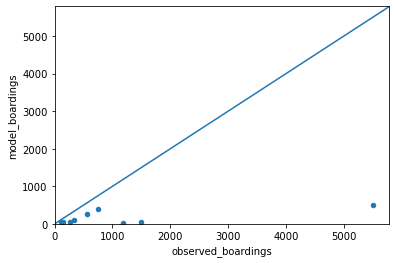

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4202,Brem-Annapolis FF,463
2,4200,Seattle-Bremerton FF,428
0,1973,973 W Sea Water Taxi,420
3,4201,Brem-Pt Orchard FF,352
5,4203,Seattle-Kingston FF,215
1,1975,975 Vashn Water Taxi,206
11,5005,WSF Fauntleroy-Vashn,191
12,5007,WSF Pt Def-Tahlequah,153
8,5002,WSF Seattle-Bain Isl,51
10,5004,WSF Fauntleroy-Swrth,47


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","45,354","-34,168",-42.97%
1,Sounder South,"6,038","3,185","-2,853",-47.26%
2,Sounder North,316,2,-314,-99.24%


r^2 : 0.9999981494134947


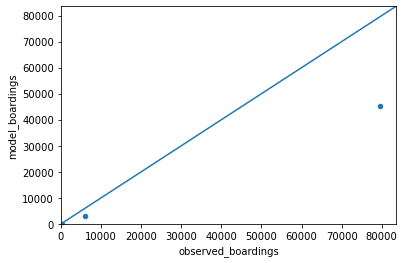

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
6,E Line RapidRide,"11,426","27,092","15,666",137.11%
0,KC Metro 7,"9,954","16,353","6,399",64.28%
1,KC Metro 40,"7,208","15,725","8,517",118.16%
4,C Line RapidRide,"7,250","15,511","8,261",113.95%
5,D Line RapidRide,"9,044","14,768","5,724",63.29%
10,Sound Transit 550,"3,351","12,505","9,154",273.17%
2,A Line RapidRide,"8,412","8,892",480,5.71%
7,F Line RapidRide,"4,748","7,119","2,371",49.93%
3,B Line RapidRide,"4,177","6,646","2,469",59.12%
9,First Hill Streetcar,"3,900","2,486","-1,414",-36.26%


r^2 : 0.8416735019628246


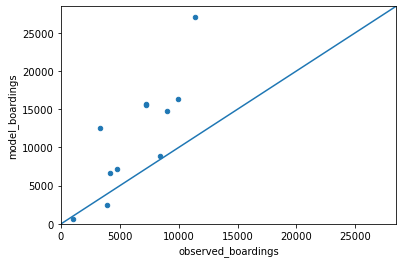

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9143732681740162


r^2 Everett Transit: 0.9938894634372688
r^2 King County Metro: 0.9353651977084823
r^2 Kitsap Transit: 0.2772257393845641
r^2 Pierce Transit: 0.8950396942628056
r^2 Sound Transit: 0.9565264922172245
r^2 Washington Ferries: 0.8410970885401432


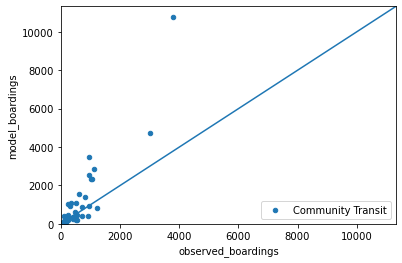

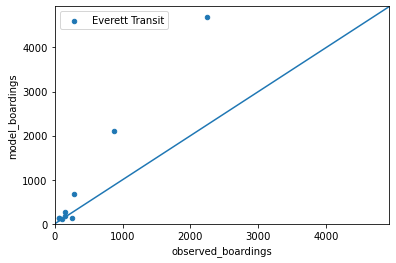

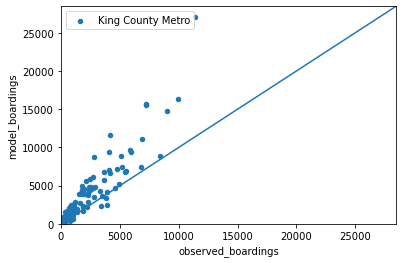

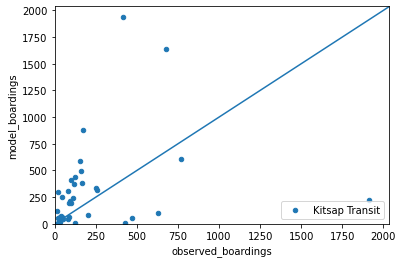

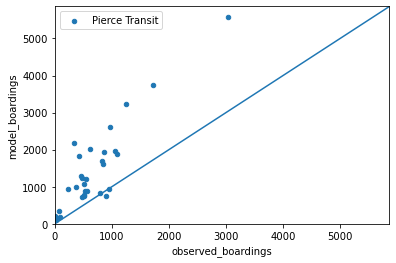

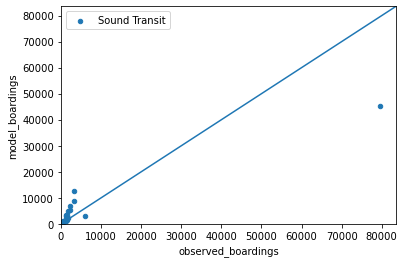

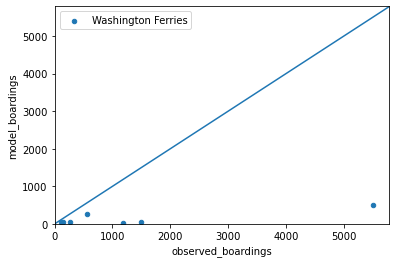

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","1,938","-4,196",-68.41%
Westlake,"8,845","5,131","-3,714",-41.99%
University St,"4,324","2,892","-1,432",-33.11%
Pioneer Square,"2,400","2,933",533,22.22%
Int'l District,"4,399","1,098","-3,301",-75.05%
Capitol Hill,"7,667","3,623","-4,044",-52.74%
Stadium,"1,731",143,"-1,588",-91.73%
SODO,"1,669","1,230",-439,-26.28%
Beacon Hill,"2,147",641,"-1,506",-70.16%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","1,938","-4,196",-68.41%
Capitol Hill,"7,667","3,623","-4,044",-52.74%
Westlake/University St,"13,169","8,024","-5,145",-39.07%
Pioneer Square/Int'l District,"6,799","4,031","-2,768",-40.71%
Stadium/SODO,"3,400","1,373","-2,027",-59.60%
Beacon Hill/Mount Baker,"4,008","1,536","-2,472",-61.67%
Columbia City,"1,630",816,-814,-49.92%
Othello/Rainier Beach,"3,525","1,732","-1,793",-50.86%
Tukwila Int'l Blvd,"2,298","1,633",-665,-28.94%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.84,-99.00,99.84,-100.85%
Westlake,0.16,0.36,-0.20,-55.36%
University St,0.32,0.20,0.12,61.52%
Pioneer Square,0.46,0.16,0.30,188.54%
Int'l District,0.59,0.45,0.14,32.08%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.48,0.12,0.36,299.35%
SODO,0.69,0.31,0.38,120.03%
Beacon Hill,0.47,0.35,0.11,32.14%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')

pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"132,000","131,962",-38,-0.03%
I-5 to Mount Vernon,3744,Snohomish,"64,400","64,440",40,0.06%
I-90 @ Snoqualmie Pass,3739,King,"33,800","33,440",-360,-1.07%
SR-507 to Yelm,3734,Pierce,"21,800","22,738",938,4.30%
SR-532 to Camano Island,3746,Snohomish,"20,700","20,763",63,0.30%
SR-3 to Belfair,3749,Kitsap,"18,400","18,117",-283,-1.54%
Hood Canal Bridge,3748,Kitsap,"17,600","17,830",230,1.31%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","9,169",69,0.76%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,050","5,966",-84,-1.39%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

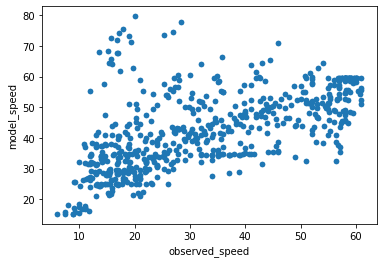

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

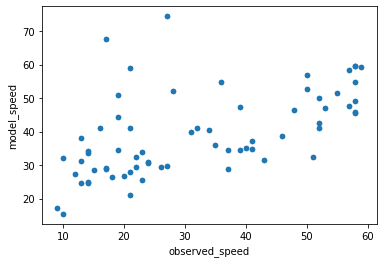

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,46,58
15,Everett to Seattle - SB,30,27
24,Tacoma to Seattle - NB,31,24
33,Seattle to Tacoma - SB,46,58
42,Bellevue to Lynnwood - NB,48,57
51,Lynnwood to Bellevue - SB,29,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,31,43
78,Auburn to Renton - NB,32,22
87,Renton to Auburn - SB,51,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

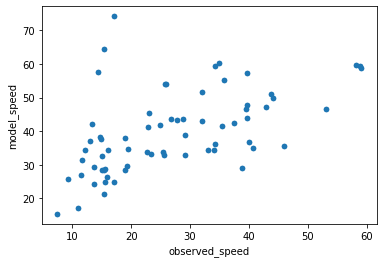

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,33,23
10,Everett to Seattle - SB,43,28
19,Tacoma to Seattle - NB,47,43
28,Seattle to Tacoma - SB,34,25
37,Bellevue to Lynnwood - NB,33,26
46,Lynnwood to Bellevue - SB,44,40
55,Tukwila to Bellevue - NB,33,29
64,Bellevue to Tukwila - SB,28,19
73,Auburn to Renton - NB,51,44
82,Renton to Auburn - SB,36,34
